# Regresión Líneal

## Imports Necesarios

In [1]:
import numpy as np
import pandas as pd
#import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
#from mpl_toolkits.mplot3d import Axes3D
#from matplotlib import cm
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('ggplot')

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

## Visualizar Archivo Leído

In [2]:
#cargamos los datos de entrada
data = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin_serie.csv", index_col=0)



In [3]:
# Ver los 1ros registros
data

,ws,wp1t-6,wp1t-8,wp1t-10,wp1t-12,wp1t-14,wp1t-16,wp1t-18,wp1t-20,wp1t-22,...,wp1t-32,wp1t-34,wp1t-36,wp1t-38,wp1t-40,wp1t-42,wp1t-44,wp1t-46,wp1t-48,wp1
4,2.93,0.249145,0.24914,0.249134,0.249127,0.249119,0.24911,0.2491,0.249089,0.249078,...,0.249029,0.249026,0.249025,0.249024,0.249025,0.249028,0.249028,0.249015,0.249005,0.035
5,2.96,0.249145,0.24914,0.249134,0.249127,0.249119,0.24911,0.2491,0.249089,0.249078,...,0.249029,0.249026,0.249025,0.249024,0.249025,0.249028,0.249028,0.249015,0.249005,0.005
6,2.81,0.249145,0.24914,0.249134,0.249127,0.249119,0.24911,0.2491,0.249089,0.249078,...,0.249029,0.249026,0.249025,0.249024,0.249025,0.249028,0.249028,0.249015,0.249005,0.000
7,2.73,0.249145,0.24914,0.249134,0.249127,0.249119,0.24911,0.2491,0.249089,0.249078,...,0.249029,0.249026,0.249025,0.249024,0.249025,0.249028,0.249028,0.249015,0.249005,0.000
8,2.87,0.249145,0.24914,0.249134,0.249127,0.249119,0.24911,0.2491,0.249089,0.249078,...,0.249029,0.249026,0.249025,0.249024,0.249025,0.249028,0.249028,0.249015,0.249005,0.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104779,5.66,0.410000,0.43100,0.452000,0.473000,0.494000,0.51400,0.5350,0.556000,0.501000,...,0.226000,0.251000,0.170000,0.221000,0.556000,0.501000,0.446000,0.391000,0.336000,0.348
104780,5.20,0.400000,0.42100,0.442000,0.462000,0.483000,0.50400,0.5250,0.546000,0.529000,...,0.254000,0.301000,0.211000,0.190000,0.286000,0.529000,0.474000,0.419000,0.364000,0.338
104781,4.24,0.390000,0.41000,0.431000,0.452000,0.473000,0.49400,0.5140,0.535000,0.556000,...,0.281000,0.226000,0.251000,0.170000,0.221000,0.556000,0.501000,0.446000,0.391000,0.327
104782,3.13,0.379000,0.40000,0.421000,0.442000,0.462000,0.48300,0.5040,0.525000,0.546000,...,0.308000,0.254000,0.301000,0.211000,0.190000,0.286000,0.529000,0.474000,0.419000,0.317


In [4]:
# Ver los 1ros registros
#data_test2

## Separar Datos de Entrenamiento (Train) y Test

In [5]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
#filtered_data = data

#data_train = data.sample(frac=1,random_state=200) 
#data_test = data.drop(data_train.index) 

# 75% train y 25% test
#data = data_test2
data_train, data_test = train_test_split(data, test_size=0.2, random_state=200)

#data_train = data

dataset_train = data_train.values
x_train = dataset_train[:,0:23]
y_train = dataset_train[:,23]


dataset_test = data_test.values
x_test = dataset_test[:,0:23]
y_test = dataset_test[:,23]


#dataX2 =  pd.DataFrame()
#dataX2["ws"] =data_train["ws"]
#dataX2["wd"] =data_train["wd"]
 
#X_train = np.array(dataX2)
#y_train = data_train['wp1'].values

In [7]:
x_train[0]

array([3.54 , 0.195, 0.17 , 0.14 , 0.175, 0.095, 0.   , 0.   , 0.   ,
       0.   , 0.241, 0.195, 0.17 , 0.14 , 0.175, 0.095, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.456, 0.01 ])

In [8]:
y_train[0]

0.456

In [9]:
x_test

array([[4.51e+00, 6.00e-02, 1.40e-01, ..., 0.00e+00, 5.00e-03, 3.00e-02],
       [3.15e+00, 4.00e-02, 1.00e-01, ..., 4.50e-02, 8.00e-02, 5.00e-02],
       [4.86e+00, 6.37e-01, 6.87e-01, ..., 1.30e-01, 3.71e-01, 3.86e-01],
       ...,
       [2.46e+00, 1.07e-01, 1.00e-01, ..., 4.00e-02, 1.00e-01, 2.50e-02],
       [5.88e+00, 2.96e-01, 2.81e-01, ..., 1.00e-02, 3.00e-02, 2.26e-01],
       [3.70e+00, 6.00e-02, 1.02e-01, ..., 2.71e-01, 4.06e-01, 4.36e-01]])

In [10]:
y_test

array([0.125, 0.085, 0.331, ..., 0.11 , 0.065, 0.256])

## Crear Modelo, Entrenarlo y Predeccir

In [11]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(x_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
#y_pred = regr.predict(dataX2)
y_pred_train = regr.predict(x_train)
y_pred_test = regr.predict(x_test)

In [12]:
##from sklearn.ensemble import GradientBoostingRegressor
#gbr = GradientBoostingRegressor(loss="ls", learning_rate=.05, n_estimators=250, max_depth=3, min_samples_leaf=25)
#gbr.fit(x_train, y_train)
#y_pred_test = gbr.predict(x_test)
#r2_score(y_test, y_pred_test)

In [13]:
import statsmodels.api as sm
my_ols = sm.OLS(y_train,x_train).fit()
y_pred_test = my_ols.predict(x_test)
r2_score(y_test, y_pred_test)

0.6635541715873456

## Obtener Metricas del Modelo

In [14]:
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)

# Este es el valor donde corta el eje Y (en X=0)
#print('Independent term: \n', regr.intercept_)

# Error Cuadrado Medio
print("Mean squared error Train: %.2f" % mean_squared_error(y_train, y_pred_train))
print("Mean squared error Test: %.2f" % mean_squared_error(y_test, y_pred_test))

# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Coefficient of determination Train (R^2): %.2f' % r2_score(y_train, y_pred_train))
#mean_absolute_error
print('Coefficient of determination Test (R^2): %.2f' % r2_score(y_test, y_pred_test))
print('mean_absolute_error train: %.2f' % mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_error test: %.2f' % mean_absolute_error(y_test, y_pred_test))

Coefficients: 
 [ 4.78616273e-02  3.90049482e-01 -2.32852837e-02 -7.91629104e-03
  7.20663058e-03  1.58148760e-02 -5.25045195e-03  2.45421629e-02
  3.17302260e-01  2.31869877e-02  2.28943712e-02 -1.14797209e-01
  1.25773970e-02  2.54536754e-02  5.78380461e-03 -1.51784054e-02
 -8.04210792e-03 -2.66179090e-02 -1.05697456e-01 -1.79218329e-02
  2.28082392e-04  7.47403261e-02  1.64570076e-02]
Mean squared error Train: 0.02
Mean squared error Test: 0.02
Coefficient of determination Train (R^2): 0.68
Coefficient of determination Test (R^2): 0.66
mean_absolute_error train: 0.10
mean_absolute_error test: 0.10


## Graficar Resultados

In [17]:
# Determinar rango de datos para graafica
pred_test_plot = y_pred_test[2000:2050]
y_test_plot = y_test[2000:2050]
corr = np.corrcoef(y_test, y_pred_test)

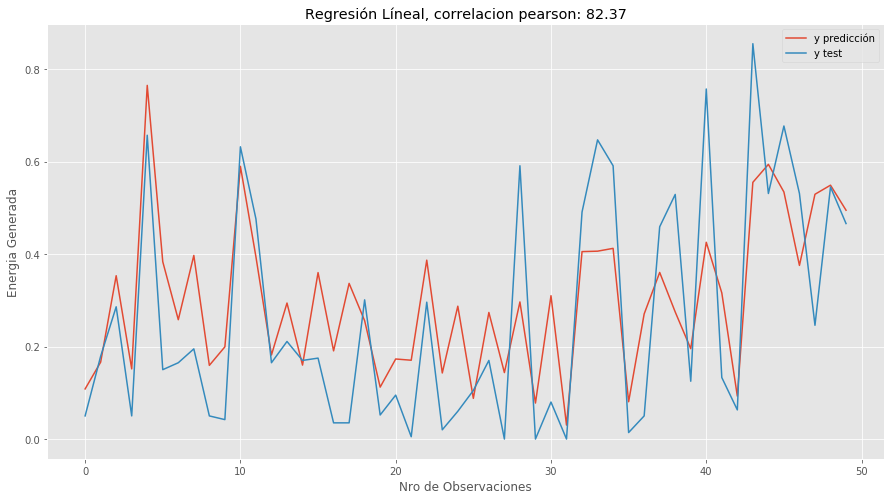

In [18]:
plt.plot(pred_test_plot, label ="y predicción")
plt.plot(y_test_plot, label ="y test")
#plt.plot(trainPredictPlot, label ="train pred" )
plt.title("Regresión Líneal, correlacion pearson: %.2f" % (corr[1][0] * 100))
plt.ylabel("Energia Generada")
plt.xlabel("Nro de Observaciones")
plt.legend()
plt.show()

## Guarda Datos de Predicción

In [41]:
df_pred = pd.DataFrame(data=pred_test_plot, columns=["pred"])
#df_pred
df_pred.to_csv('/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/pred_iter1_reglin.csv')